# tracking clouds - test & show

Define clouds, basic tools


### Nov 2020, JAH

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt

to_df = pd.DataFrame.from_records

In [3]:
import hipy.utils        as ut
import hipy.pltext       as pltext
import hipy.hfit         as hfit

import bes.bes           as bes
import bes.clouds        as clouds
import bes.chits         as chits
import bes.display       as nplay
import clouds        as clouds
import pltclouds     as pltclouds

In [4]:
pltext.style()

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Wed Dec  9 18:01:45 2020


### load data

In [5]:
def get_chits_filename(run_number, label = 'ds_rough'):
    datadir    = f"/home/hernando/data/NEW"
    run_number = str(run_number)
    filename   = datadir + f'/chits_{label}_{run_number}.h5'
    return filename


In [7]:
run_number = 8182
fname = get_chits_filename(run_number)
print(fname)
ddh    = pd.read_hdf(fname, 'CHITs.lowTh')
dde    = ddh.groupby('event')
events = np.unique(ddh.event.values)
print('total events ', len(events))

/home/hernando/data/NEW/chits_ds_rough_8182.h5
total events  2760


In [8]:
ddh

,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
0,311,1.602604e+09,0,71.804477,-4.516273,1,75.0,-5.0,0.0,0.0,232.378713,11.466354,207.362455,-1.0,0.000804,-1,-1.0
1,311,1.602604e+09,0,71.804477,-4.516273,1,65.0,-5.0,0.0,0.0,232.378713,9.508168,171.949779,-1.0,0.000658,-1,-1.0
2,311,1.602604e+09,0,71.804477,-4.516273,1,85.0,5.0,0.0,0.0,232.378713,7.788881,140.857459,-1.0,0.000552,-1,-1.0
3,311,1.602604e+09,0,71.804477,-4.516273,1,85.0,-5.0,0.0,0.0,232.378713,7.362239,133.141875,-1.0,0.000522,-1,-1.0
4,311,1.602604e+09,0,71.804477,-4.516273,1,65.0,5.0,0.0,0.0,232.378713,6.791595,122.822099,-1.0,0.000471,-1,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061354,2621895,1.602688e+09,0,76.488142,18.951034,1,105.0,35.0,0.0,0.0,255.008522,8.347710,155.514324,-1.0,0.000647,-1,-1.0
2061355,2621895,1.602688e+09,0,76.488142,18.951034,1,105.0,5.0,0.0,0.0,255.008522,7.884620,146.887162,-1.0,0.000599,-1,-1.0
2061356,2621895,1.602688e+09,0,76.488142,18.951034,1,115.0,5.0,0.0,0.0,255.008522,7.209332,134.306835,-1.0,0.000555,-1,-1.0
2061357,2621895,1.602688e+09,0,76.488142,18.951034,1,95.0,5.0,0.0,0.0,255.008522,6.578020,122.545751,-1.0,0.000486,-1,-1.0


In [9]:
def draw_event(event = None):
    event = np.random.choice(events, 1)[0] if event is None else event
    print('event ', event)
    hh    = dde.get_group(event)
    x, y, z, erec, eraw = chits.get_hits(hh, ('X', 'Y', 'Z', 'Ec', 'E'))
    #x, y, z, eraw = hits(hh, 'E')
    
    nplay.event(x, y, z, erec, alpha = 0.2, cmap = 'jet');
    #nplay.wf(x, y, z, erec, cmap = 'jet');
    #nplay.wf(x, y, z, eraw, cmap = 'jet');
    #nplay.wfcalib(x, y, z, erec, eraw, cmap = 'jet')
    

## Load Event

event  1015212


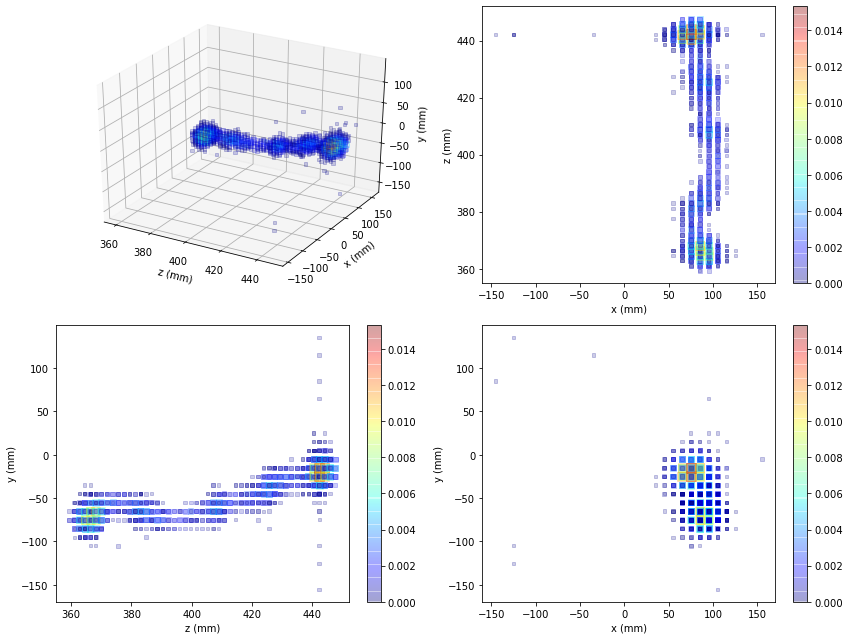

In [143]:
xevents = [1241463, 981141, 2300475, 543247]
#xevents = [1002903, 928609, 1057115, 226373]
#xevents = 1883117, 1368698 # one-electron
#xevents = 2617619 # multiple-connections!
#xevents = 1477362 # double-electrons
#xevents = 2141627 # problem with the link! ISSUE
# event_track   = 872975, 1855276, 2017780
# events_2e     =  313053,  1306119, 2108616
# events_1e     =  2451063
# event_loops   =  285947
# event_brokend = 39402
#event_satelites = [285627, 2141627]

xevents = np.unique(ddh.event.values)
event   = np.random.choice(xevents, 1)[0]
#event   = 1645993, 1807203, 756596, 39402 # A nice track
draw_event(event)

## Load the event

In [144]:
#event = 543247
hh    = dde.get_group(event)
x, y, z, erec, eraw = chits.get_hits(hh, ('X', 'Y', 'Z', 'Ec', 'E'))
xstep, ystep, zstep = 10., 10., 2.

## Run clouds

In [145]:
ndim    = 3
coors   = (x, y, z)
steps   = (xstep, ystep, zstep)
weights = eraw

dfclouds = clouds.clouds(coors, steps, weights)
#dfclouds

## Draw clouds

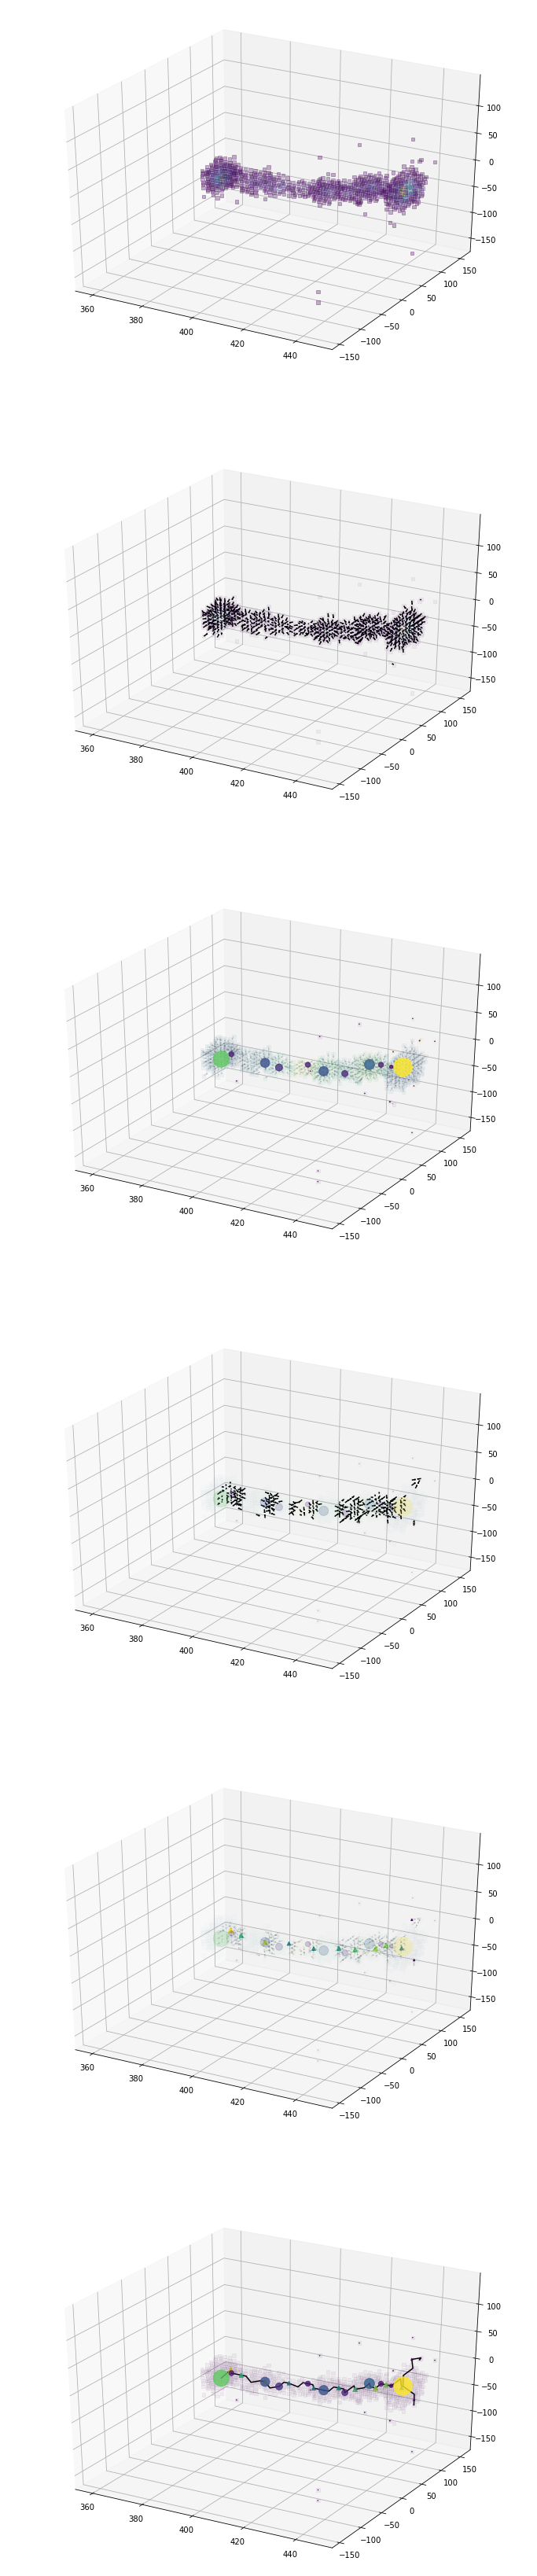

In [146]:
pltclouds.dcloud_steps(dfclouds, ndim, scale = 0.004, xaxis = 2)

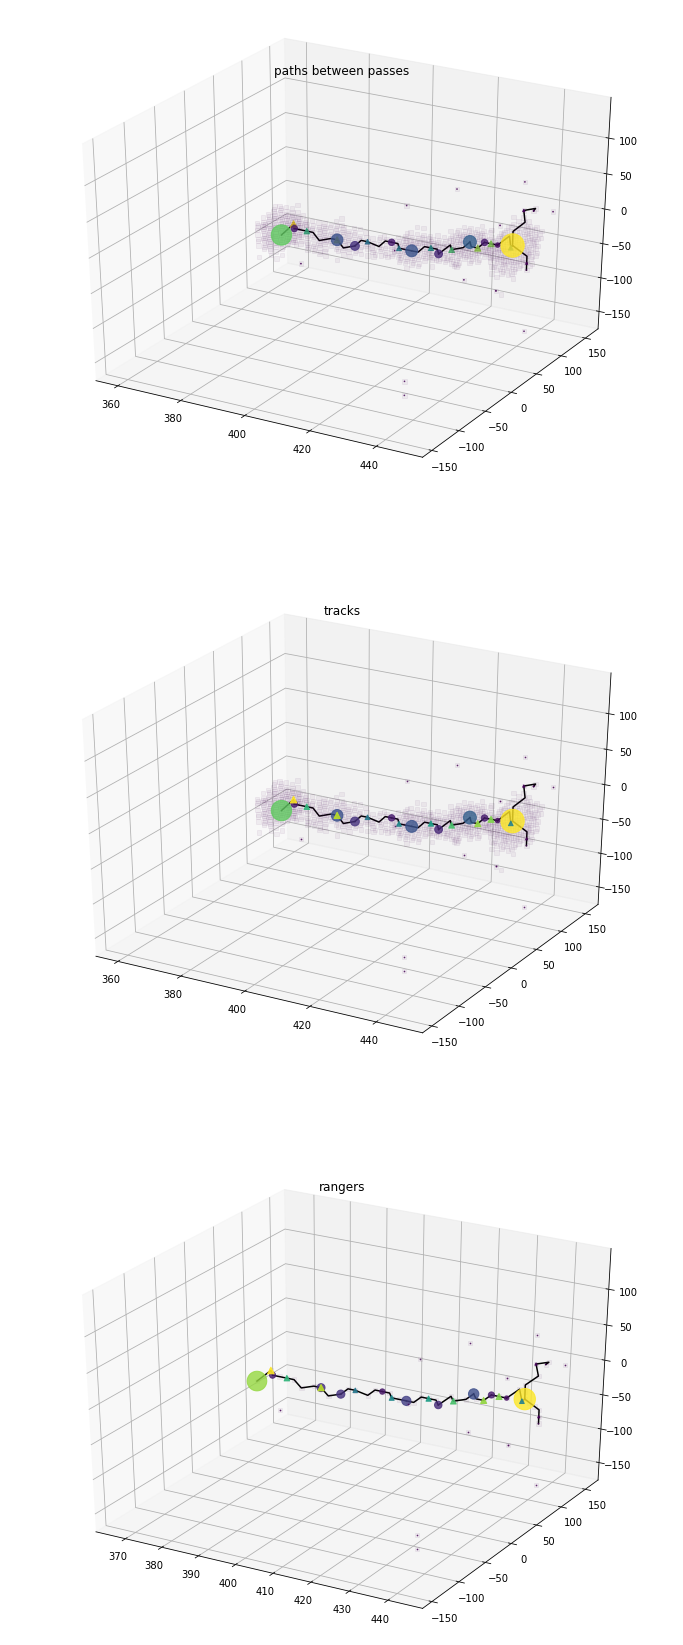

In [147]:
pltclouds.dcloud_steps_tracks(dfclouds, ndim, scale = 0.004, xaxis = 2)

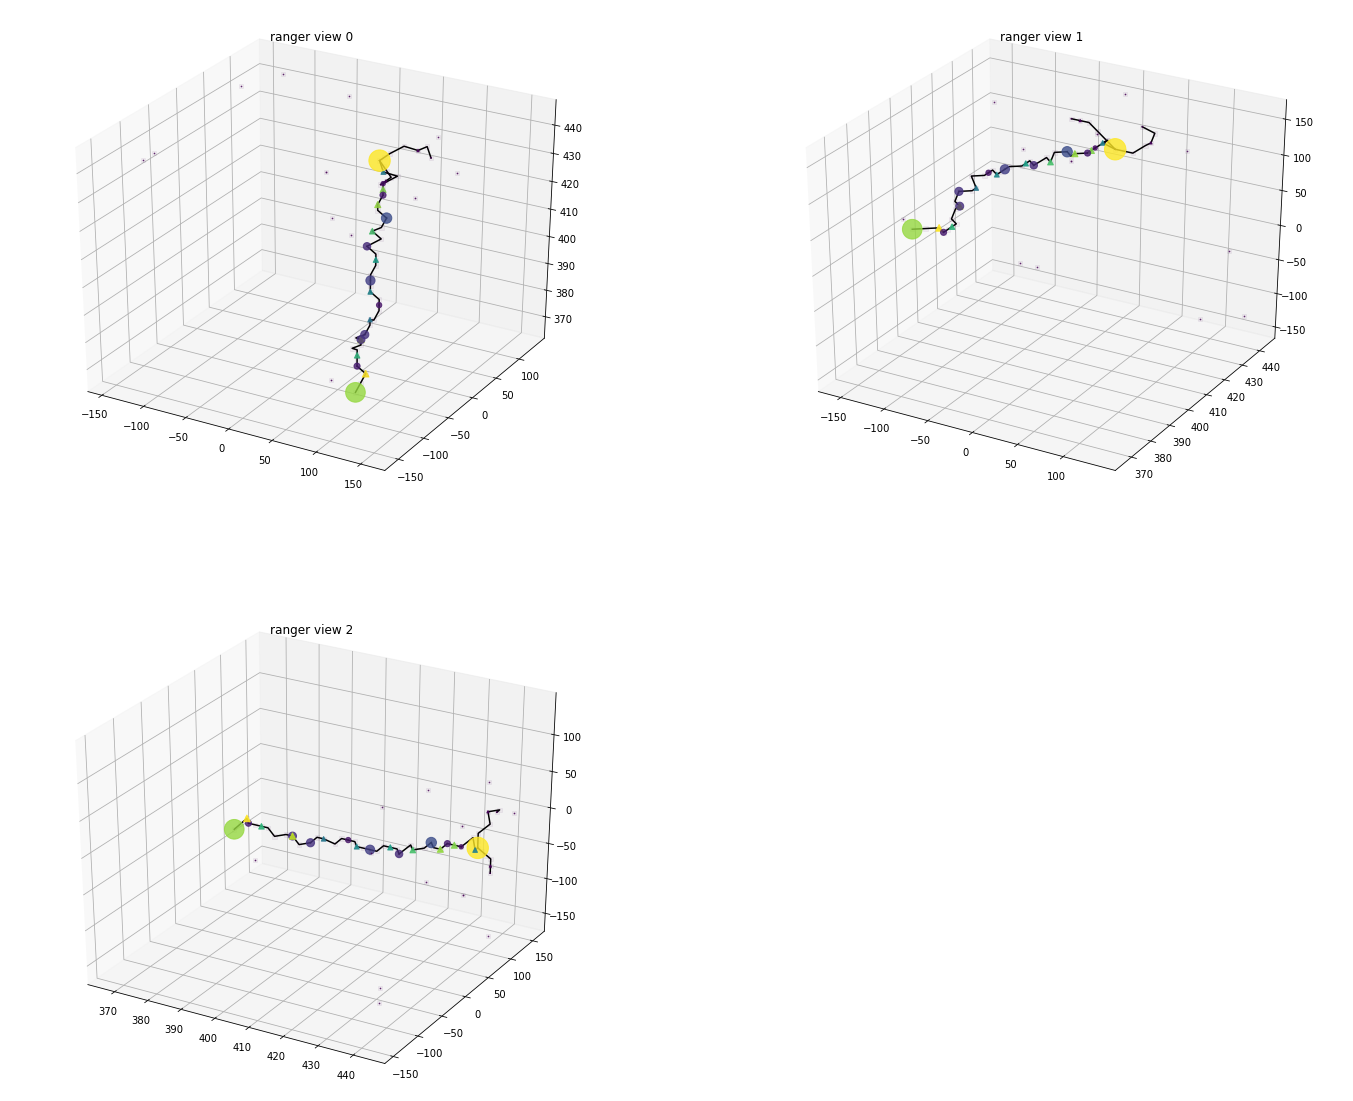

In [148]:
if (ndim == 3):
    pltclouds.dcloud_tracks_3dviews(dfclouds, scale = 0.004, type = 'ranger')